# **SIMULATING HEART DISEASE REASONING USING BAYESIAN NETWORKS**

The data and network is from Mahesh Huddar's video on the same, where he explains the maths that goes on in the background [LINK](https://www.youtube.com/watch?v=bdWZNoV4Lkc&list=PLAQje4L5NVW7g6moHxjPiXcAqTcHwVaDI&index=6).

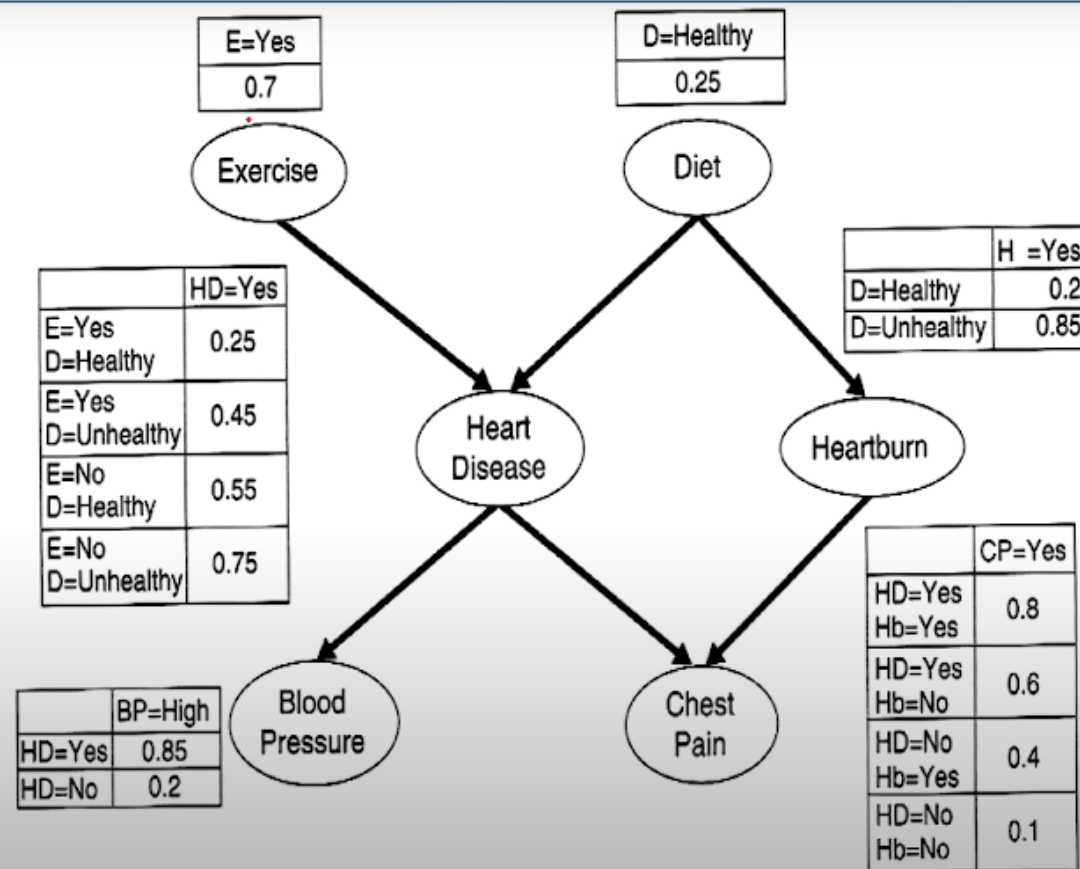
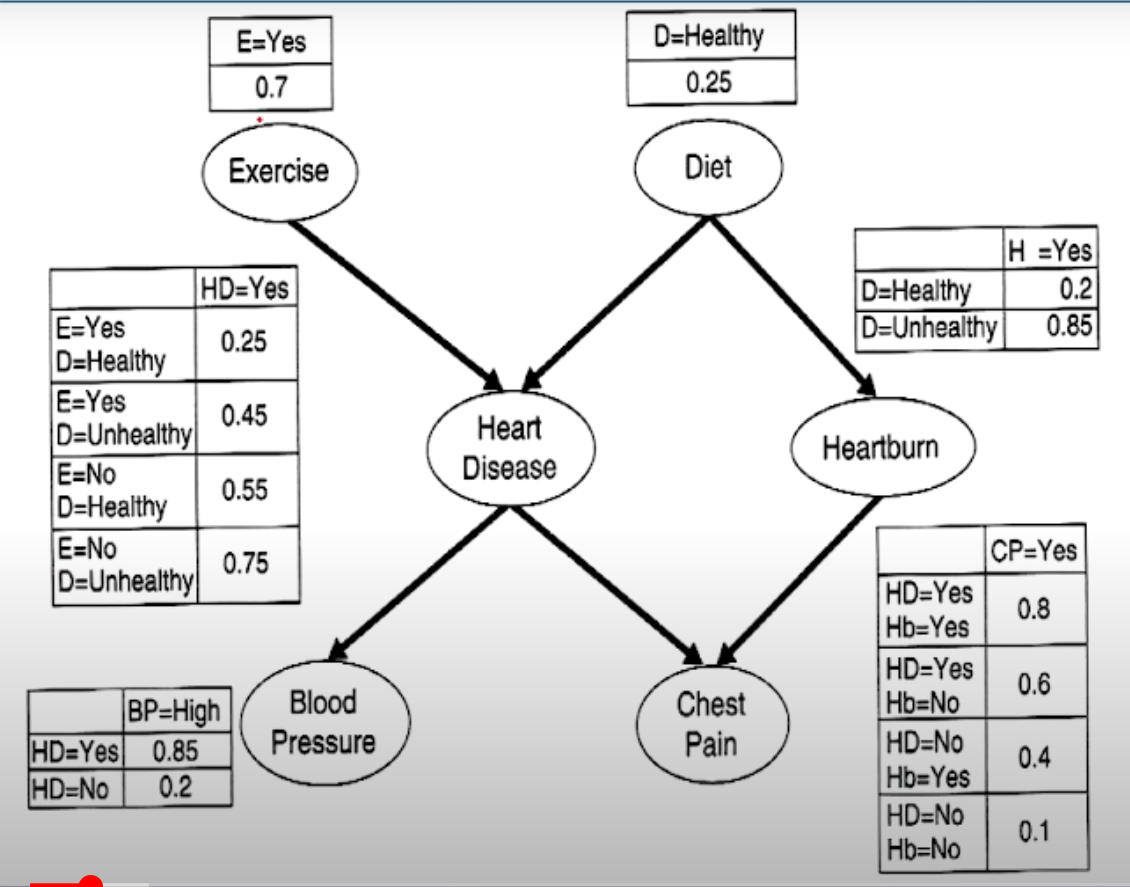

### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

Assume that we need to find the probability of Heart Disease given Blood Pressure = High.

i.e,

$$
p(hd \mid bp) = \Sigma_{e} \Sigma_{d} \Sigma_{hb} \Sigma_{cp}  p(e, d, hd, bp, cp)
$$

and, from the network :

$$
p(e, d, hd, bp, cp) = \alpha \cdot p(e) \cdot p(d) \cdot p(hd \mid e, d) \cdot p(hd \mid d) \cdot p(cp \mid hd, hb) \cdot p(bp \mid hd)
$$

And, as Heart Disease only depends on $e$ and $d$, we remove the other $\Sigma$ 

i.e, 

$$
p(hd \mid bp) = \alpha \cdot p(bp \mid hd) \cdot \Sigma_{e} p(e) \Sigma_{d} p(hd \mid e, d) \cdot p(d)
$$


In [ ]:
# Given Values :

pe = [0.7, 0.3]

pd = [0.25, 0.75]

hd_e_d = {
    (0, 0) : [0.25, 0.75],
    (0, 1) : [0.45, 0.55],
    (1, 0) : [0.55, 0.45],
    (1, 1) : [0.75, 0.25]
}

bp_hd = [
    [0.85, 0.15],
    [0.2, 0.8]
]

# Assume 0 -> True, 1 -> False

In [26]:
ans = 0

for e in range(0, 2):
    for d in range(0, 2):
        ans = ans + (pe[e] * hd_e_d[(e, d)][0] * pd[d])

hd_bp = ans * bp_hd[0][0] 

In [27]:
ans = 0

for e in range(0, 2):
    for d in range(0, 2):
        ans = ans + (pe[e] * pd[d] * hd_e_d[(e, d)][1])

n_hd_bp = ans * bp_hd[1][0] 

In [28]:
hd_bp = hd_bp/(hd_bp + n_hd_bp)
hd_bp

0.8032786885245902

Hence, the probability of having heart disease given that you have blood pressure is ~80%